<a href="https://colab.research.google.com/github/ibnabA1/Multivariate-time-series-forecasting-Model-using-LSTM-/blob/main/DS_PROJECT_LSTM_MODEL_STOCK_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#location of the file in your google drive
file_path="/content/drive/MyDrive/NVDA.csv"

In [ ]:
df=pd.read_csv(file_path)
#convert the date column into datatime format for understanding
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y')
#display the dataframe now
print(df.head())

        Date       Open       High        Low      Close  Adj Close    Volume
0 2019-04-17  47.404999  47.615002  46.597500  46.822498  46.504501  35100400
1 2019-04-18  46.889999  47.232498  46.294998  46.575001  46.258686  38098800
2 2019-04-22  46.337502  47.275002  46.020000  47.117500  46.797493  27993600
3 2019-04-23  47.250000  47.982498  47.152500  47.667500  47.343758  34685600
4 2019-04-24  47.772499  48.202499  47.160000  47.792500  47.467922  31820400


In [ ]:
#calculating the moving average with a window size of 10
df['Moving_Average_10']=df['Close'].rolling(window=10).mean()

#display the dataframe with the new column
print(df.head(15)) #displaying 15 rows from 0-14

         Date       Open       High        Low      Close  Adj Close  \
0  2019-04-17  47.404999  47.615002  46.597500  46.822498  46.504501   
1  2019-04-18  46.889999  47.232498  46.294998  46.575001  46.258686   
2  2019-04-22  46.337502  47.275002  46.020000  47.117500  46.797493   
3  2019-04-23  47.250000  47.982498  47.152500  47.667500  47.343758   
4  2019-04-24  47.772499  48.202499  47.160000  47.792500  47.467922   
5  2019-04-25  47.387501  47.612499  45.924999  46.727501  46.410149   
6  2019-04-26  45.177502  45.222500  43.325001  44.522499  44.220127   
7  2019-04-29  44.602501  45.112499  43.875000  44.832500  44.528023   
8  2019-04-30  44.507500  45.507500  44.314999  45.250000  44.942680   
9  2019-05-01  45.777500  46.202499  45.115002  45.117500  44.811092   
10 2019-05-02  45.215000  46.217499  44.779999  45.797501  45.486473   
11 2019-05-03  45.882500  45.982498  45.132500  45.752499  45.441780   
12 2019-05-06  43.875000  45.084999  43.500000  44.962502  44.65

In [ ]:
#the first 10 values are nan because we need 10 values before to calculate the moving average with the window of 10

DATA CLEANING AND DATA PREPROCESSING


In [ ]:
#check for nan values
nan_counts=df.isna().sum()

#display nan values
print(nan_counts)

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Moving_Average_10    9
dtype: int64


In [ ]:
#filling nan column for a newly added column moving_average_10 using backward fill
df['Moving_Average_10'].fillna(method='bfill', inplace=True, limit=10)
print(df.head(11))

         Date       Open       High        Low      Close  Adj Close  \
0  2019-04-17  47.404999  47.615002  46.597500  46.822498  46.504501   
1  2019-04-18  46.889999  47.232498  46.294998  46.575001  46.258686   
2  2019-04-22  46.337502  47.275002  46.020000  47.117500  46.797493   
3  2019-04-23  47.250000  47.982498  47.152500  47.667500  47.343758   
4  2019-04-24  47.772499  48.202499  47.160000  47.792500  47.467922   
5  2019-04-25  47.387501  47.612499  45.924999  46.727501  46.410149   
6  2019-04-26  45.177502  45.222500  43.325001  44.522499  44.220127   
7  2019-04-29  44.602501  45.112499  43.875000  44.832500  44.528023   
8  2019-04-30  44.507500  45.507500  44.314999  45.250000  44.942680   
9  2019-05-01  45.777500  46.202499  45.115002  45.117500  44.811092   
10 2019-05-02  45.215000  46.217499  44.779999  45.797501  45.486473   

      Volume  Moving_Average_10  
0   35100400            46.2425  
1   38098800            46.2425  
2   27993600            46.2425  

<ipython-input-7-14e07d8258ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Moving_Average_10'].fillna(method='bfill', inplace=True, limit=10)
<ipython-input-7-14e07d8258ef>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Moving_Average_10'].fillna(method='bfill', inplace=True, limit=10)


In [ ]:
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2019-04-17   47.404999   47.615002   46.597500   46.822498   46.504501   
1    2019-04-18   46.889999   47.232498   46.294998   46.575001   46.258686   
2    2019-04-22   46.337502   47.275002   46.020000   47.117500   46.797493   
3    2019-04-23   47.250000   47.982498   47.152500   47.667500   47.343758   
4    2019-04-24   47.772499   48.202499   47.160000   47.792500   47.467922   
...         ...         ...         ...         ...         ...         ...   
1254 2024-04-11  874.200012  907.390015  869.260010  906.159973  906.159973   
1255 2024-04-12  896.989990  901.750000  875.299988  881.859985  881.859985   
1256 2024-04-15  890.979980  906.130005  859.289978  860.010010  860.010010   
1257 2024-04-16  864.330017  881.179993  860.640015  874.150024  874.150024   
1258 2024-04-17  883.000000  887.750000  839.500000  840.349976  840.349976   

        Volume  Moving_Average_10  
0     35100400 

# **BUILDING LSTM MODEL**

In [ ]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'Volume', 'Moving_Average_10']])
df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']] = scaled_data


In [ ]:
#90 days in advance prediction
#model recognize and caputure the patterns of 90 days

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#Define window size for squences
window_size=90


# Create squences for training, validation and testing

#creating sequence of 90 rows, and appending them into the list
# len(df)-windows size, if length of df is 1000 and window size is 90 so loop run from 0 to 909, in iteration[0] first 90 rows, in iteration[909] rows from 909 to 1000
# formula of sequence overlapping i:i+window size, in below example for sake of simplicity i take window size 3
# the overlapping is happening because 0:3, 0 is the starting index and 3 in the ending index
# in a iteration[0] we get [0,1,2]
# the second iteration starts and end as 1:4
# in index 1 we have number 1 and in index 2 we have number 2 and the second iteration runs from index 1 to 4
# we have values[1,2,3]

sequences = []
for i in range(len(df) - window_size):
    seq = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].values[i:i+window_size]
    sequences.append(seq)

#convert sequences to pytorch tensors
sequences=torch.tensor(sequences, dtype=torch.float32)
X=sequences[:, :-1] #input sequences
y=sequences[:, -1] #target sequences


<ipython-input-10-a8d7c0ce4c0b>:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  sequences=torch.tensor(sequences, dtype=torch.float32)


In [ ]:
#split the data into training, validation and testing
train_ratio=0.6
val_ratio=0.2
test_ratio=0.2

num_samples=len(sequences)
train_samples=int(train_ratio*num_samples)
val_samples=int(val_ratio*num_samples)
test_samples=num_samples-train_samples-val_samples

X_train, X_val, X_test = X[:train_samples], X[train_samples:train_samples + val_samples], X[train_samples + val_samples:]
y_train, y_val, y_test = y[:train_samples], y[train_samples:train_samples + val_samples], y[train_samples + val_samples:]

#reshaping target tensors to have correct shape(batch_size and output_size)
y_train=y_train.view(-1,3)
y_val = y_val.view(-1, 3)
y_test = y_test.view(-1, 3)



#creating dataloader for training, validation, and testing set with batch size
train_dataset= TensorDataset(X_train, y_train)
train_loader=DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset= TensorDataset(X_val, y_val)
val_loader=DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataset=TensorDataset(X_test, y_test)
test_loader=DataLoader(test_dataset, batch_size=64, shuffle=False)



Epoch 1/100, Train Loss: 0.006440149154514074, Val Loss: 0.0037050708197057247
Epoch 2/100, Train Loss: 0.005055517423897982, Val Loss: 0.0026802890934050083
Epoch 3/100, Train Loss: 0.005407155025750399, Val Loss: 0.0031443596817553043
Epoch 4/100, Train Loss: 0.003326216246932745, Val Loss: 0.0024951095692813396
Epoch 5/100, Train Loss: 0.004017053637653589, Val Loss: 0.002477402100339532
Epoch 6/100, Train Loss: 0.005363132804632187, Val Loss: 0.002469718921929598
Epoch 7/100, Train Loss: 0.0021316823549568653, Val Loss: 0.002637794241309166
Epoch 8/100, Train Loss: 0.0040379296988248825, Val Loss: 0.0023971651680767536
Epoch 9/100, Train Loss: 0.0022771318908780813, Val Loss: 0.002450845204293728
Epoch 10/100, Train Loss: 0.004839940927922726, Val Loss: 0.002377505647018552
Epoch 11/100, Train Loss: 0.0021456428803503513, Val Loss: 0.0024427406024187803
Epoch 12/100, Train Loss: 0.002762035932391882, Val Loss: 0.002401430392637849
Epoch 13/100, Train Loss: 0.0032869887072592974, Va

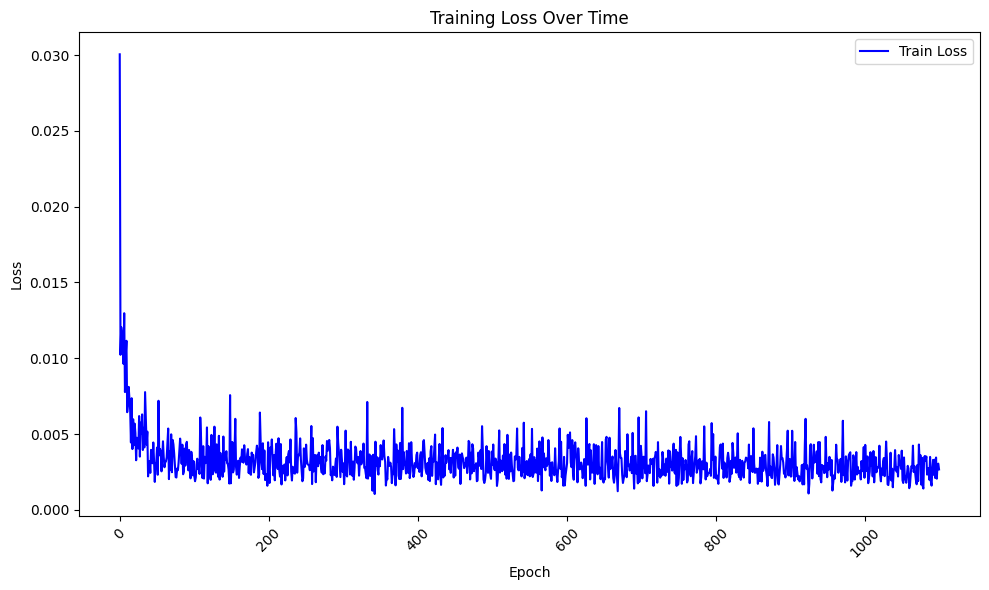

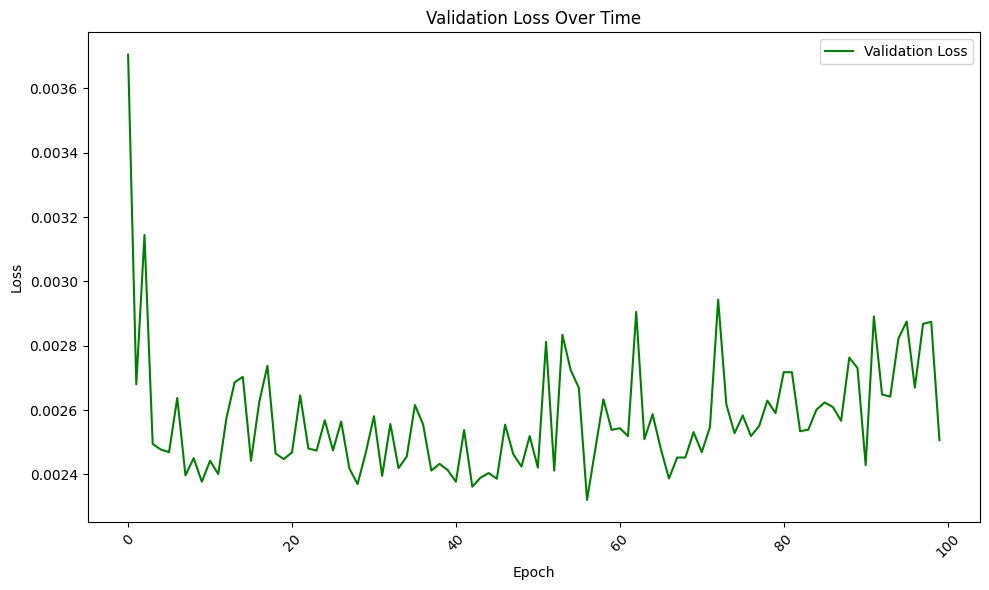

Test Loss: 0.008457173779606818


<ipython-input-12-1f6c0e641fc9>:104: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('best_model.pth'))


In [ ]:
#defining enhanced LSTM MODEL
class EnhancedLSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size):
      super(EnhancedLSTM,self).__init__()
      self.hidden_size=hidden_size
      self.num_layers=num_layers
      self.lstm=nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
      self.fc=nn.Linear(hidden_size, output_size)
#Imagine an Analyst Reviewing Stock Data:
#The analyst reviews stock prices, trading volumes, and moving averages over 90 days.
#Each day's data contributes to their understanding of the overall trend.
#At the end of the 90 days, the analyst summarizes their findings and makes a prediction for the next few days.

#In this analogy:
#The LSTM is like the analyst, learning patterns day by day.
#The hidden state at the last timestep (out[:, -1, :]) is the analyst's summary.
#The FC layer is the decision-making process, converting the summary into actionable predictions.

  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
    out, _ = self.lstm(x,(h0,c0))
    #90th day, summmrrizies the understanding of past 89 days and 90 day understanding is the conclusion of that
    out= self.fc(out[:, -1, :]) #get the output from the last time step only
    return out


# define hyperparameters and instiate the model
input_size = 3  # Adjust based on your feature dimension
hidden_size = 64  # Best hyperparameter from your GridSearchCV
num_layers = 2  # Best hyperparameter from your GridSearchCV
output_size = 3  # Adjust based on your output dimension
model = EnhancedLSTM(input_size, hidden_size, num_layers, output_size)


# define the loss function and optimizer
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=0.01)



#training loop with dataloader and validation
num_epochs = 100
train_losses=[]
val_losses=[]
best_val_loss = float('inf')
for epoch in range(num_epochs):
  model.train()

  for inputs, targets in train_loader:
    optimizer.zero_grad()
    outputs=model(inputs)
    loss= criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

  #Validaiton
  model.eval()
  val_loss=0.0
  with torch.no_grad():
    for val_inputs, val_targets in val_loader:
      val_outputs =model(val_inputs)
      val_loss += criterion(val_outputs, val_targets)
  val_loss /= len(val_loader)
  val_losses.append(val_loss.item())

  print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')

  # saving the model with best validation loss
  if val_loss < best_val_loss:
    best_val_loss=val_loss
    torch.save(model.state_dict(), 'best_model.pth')



# Plotting training loss over time
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', color='blue')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting validation loss over time
plt.figure(figsize=(10, 6))
plt.plot(val_losses, label='Validation Loss', color='green')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Load the best model for testing
best_model = EnhancedLSTM(input_size, hidden_size, num_layers, output_size)
best_model.load_state_dict(torch.load('best_model.pth'))

# Evaluate model on testing set
best_model.eval()
test_loss = 0.0
with torch.no_grad():
    for test_inputs, test_targets in test_loader:
        test_outputs = best_model(test_inputs)
        test_loss += criterion(test_outputs, test_targets).item() * len(test_inputs)
test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss}')












In [ ]:
#he prediction code is essentially asking the model:
#"Can you correctly predict the next value for the sequences from the data you were trained on?"
#It isn't predicting the future, just checking if the model learned past patterns correctly.
#it takes the acutal data from df and plot it as a blue line and then takes the predicted vlaue which models gives and see how well it predicts it

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch

# Assuming df contains the required data

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'Volume', 'Moving_Average_10']])
df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']] = scaled_data

# Assuming the window size used during training is 90 for three-month predictions
window_size = 90

# Create sequences for prediction
sequences_pred = []
for i in range(len(df) - window_size + 1):
    seq = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].values[i:i+window_size]
    sequences_pred.append(seq)

# Convert sequences to PyTorch tensor and reshape
X_pred = torch.tensor(sequences_pred, dtype=torch.float32)





In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    predicted_values = model(X_pred)

# Inverse scale the predicted values to get actual stock prices in USD
predicted_prices = scaler.inverse_transform(predicted_values.view(-1, 3))

# Create a new DataFrame for easier plotting
predicted_df = pd.DataFrame(predicted_prices, columns=['Predicted Open', 'Predicted Volume', 'Predicted Moving Average'])
predicted_df['Date'] = df['Date'][-len(predicted_prices):].reset_index(drop=True)

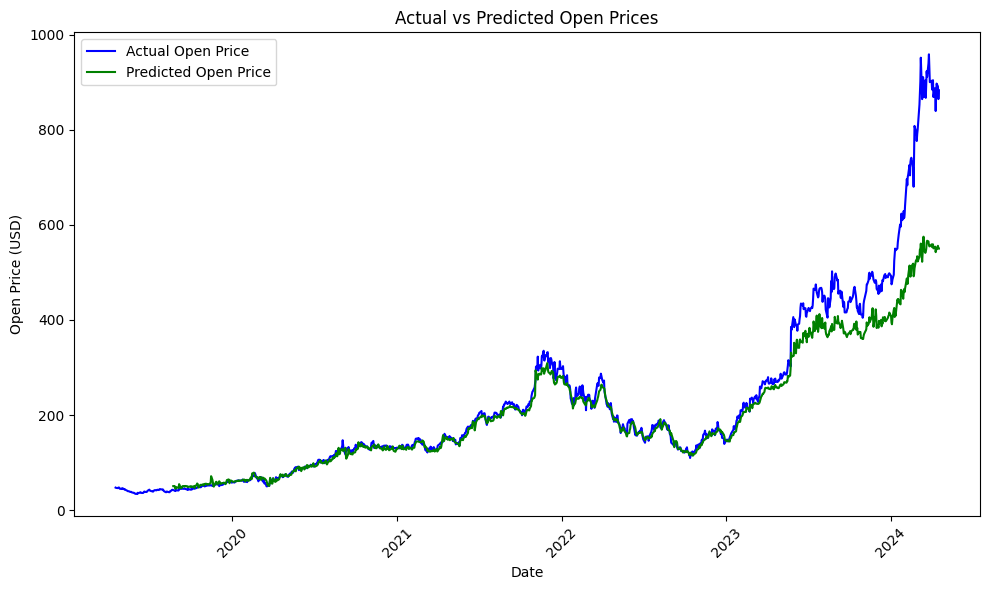

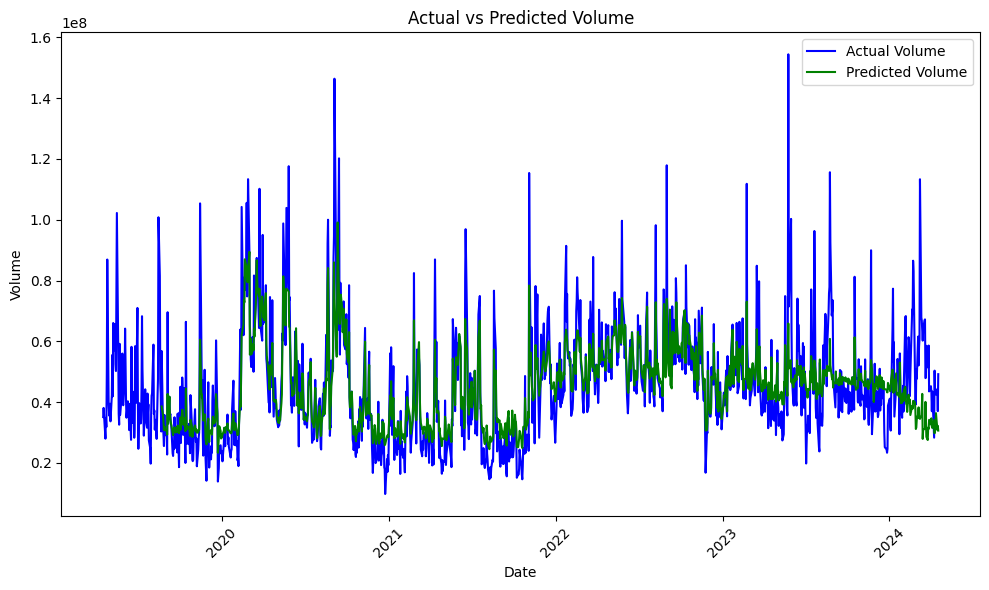

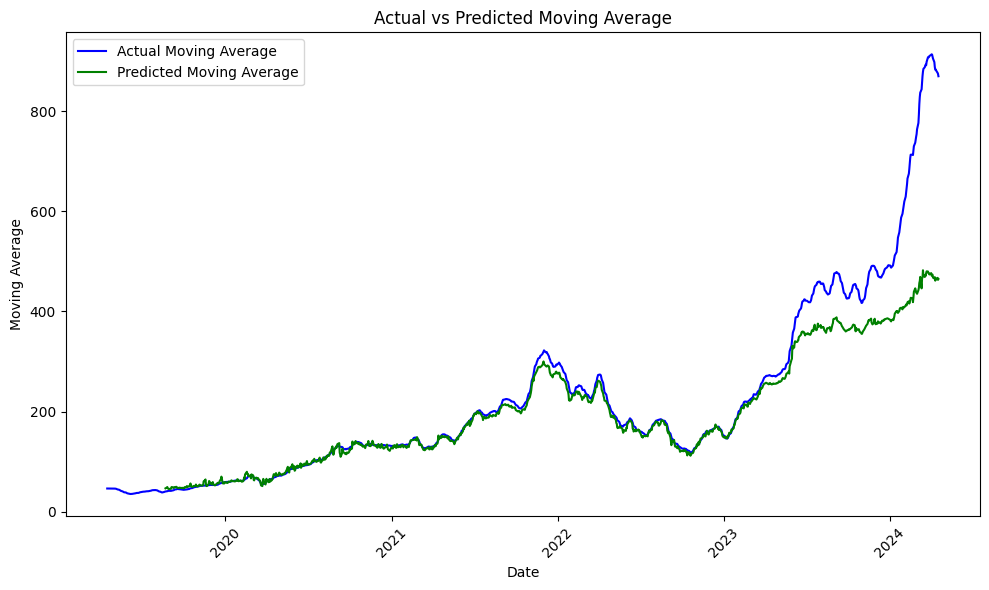

In [ ]:
# Plotting

# Plot predicted Open prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Actual Open Price', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Open'], label='Predicted Open Price', color='green')

plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.title('Actual vs Predicted Open Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot predicted Volume
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Actual Volume', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Volume'], label='Predicted Volume', color='green')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Actual vs Predicted Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot predicted Moving Average
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Moving_Average_10'], label='Actual Moving Average', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Moving Average'], label='Predicted Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Actual vs Predicted Moving Average')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **future data prediction**


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch

# Assuming df contains the required data

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'Volume', 'Moving_Average_10']])
df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']] = scaled_data

# Assuming the window size used during training is 90 for three-month predictions
window_size = 90

# Create sequences for prediction
sequences_pred = []
for i in range(len(df) - window_size + 1):
    seq = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].values[i:i+window_size]
    sequences_pred.append(seq)

# Convert sequences to PyTorch tensor and reshape
X_pred = torch.tensor(sequences_pred, dtype=torch.float32)

In [ ]:
# Set the model to evaluation mode
best_model.eval()

# Make predictions for the next 90 days
with torch.no_grad():
    predicted_values = model(X_pred)

In [ ]:
# Inverse scale the predicted values to get actual stock prices in USD
predicted_prices = scaler.inverse_transform(predicted_values.view(-1, 3))

# Create a new DataFrame for easier plotting
predicted_df = pd.DataFrame(predicted_prices, columns=['Predicted Open', 'Predicted Volume', 'Predicted Moving Average'])
predicted_df['Date'] = df['Date'][-len(predicted_prices):].reset_index(drop=True)

In [ ]:
# Get the last 90 data points for the next prediction
last_90_data = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].tail(window_size).values
#print(last_90_data)
next_sequence_tensor = torch.tensor(last_90_data.reshape(1, window_size, 3), dtype=torch.float32)

In [ ]:
# Predict the next 90 days
next_predictions = []
next_sequence = next_sequence_tensor.clone()
for _ in range(90):
    with torch.no_grad():
        next_prediction = model(next_sequence)
    next_predictions.append(next_prediction)
    # Update the sequence for the next prediction
    next_sequence = torch.cat((next_sequence[:, 1:, :], next_prediction.unsqueeze(1)), dim=1)
    #print(next_sequence)

# Inverse scale the predicted values and append to the DataFrame
next_prediction_prices = scaler.inverse_transform(torch.cat(next_predictions, dim=1).view(-1, 3))
next_prediction_dates = pd.date_range(df['Date'].max() + pd.DateOffset(days=1), periods=90, freq='D')
next_predicted_df = pd.DataFrame(next_prediction_prices, columns=['Predicted Open', 'Predicted Volume', 'Predicted Moving Average'])
next_predicted_df['Date'] = next_prediction_dates
print("predicted prices",next_predicted_df)

predicted_df = pd.concat([predicted_df, next_predicted_df], ignore_index=True)

predicted prices     Predicted Open  Predicted Volume  Predicted Moving Average       Date
0       574.439341      6.444727e+07                607.603789 2024-04-18
1       493.899859      5.515074e+07                561.718143 2024-04-19
2       479.031868      6.896910e+07                543.866117 2024-04-20
3       446.008953      7.578079e+07                515.799414 2024-04-21
4       406.435536      6.516137e+07                483.619307 2024-04-22
..             ...               ...                       ...        ...
85      277.067098      5.096045e+07                285.358039 2024-07-12
86      277.057152      5.095975e+07                285.345581 2024-07-13
87      277.047949      5.095911e+07                285.334065 2024-07-14
88      277.039490      5.095852e+07                285.323491 2024-07-15
89      277.031692      5.095798e+07                285.313703 2024-07-16

[90 rows x 4 columns]


In [ ]:
plt.figure(figsize=(12, 6))

# Plot actual open prices
plt.plot(df['Date'], df['Open'], label='Actual Open Price', color='blue', linewidth=2)

# Plot predicted open prices
plt.plot(predicted_df['Date'], predicted_df['Predicted Open'], label='Predicted Open Price', color='green', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open Price (USD)', fontsize=12)
plt.title('Actual vs Predicted Open Prices for the Next 90 Days', fontsize=14)
plt.legend(fontsize=10)

# Format the X-axis for dates
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()

# Plotting Volume
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Actual Volume', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Volume'], label='Predicted Volume', color='green')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Actual vs Predicted Volume for the Next 90 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Moving Average
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Moving_Average_10'], label='Actual Moving Average', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Moving Average'], label='Predicted Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Actual vs Predicted Moving Average for the Next 90 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined